# Data Exploration for the Zillow dataset

In [1]:
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
prop_features = pd.read_csv('../data/properties_2016.csv')
num_data = len(prop_features)


/Users/wathid/anaconda/lib/python2.7/site-packages/pandas/io/parsers.py:1170: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


In [3]:
null_features = prop_features.isnull().sum(axis=0).reset_index()
null_features.columns = ['column_name', 'missing_percent']
null_features['missing_percent'] = null_features['missing_percent']*100/num_data


In [4]:
null_features = null_features.sort('missing_percent')

In [12]:
null_features

,column_name,missing_percent
0,parcelid,0.000000
17,fips,0.383121
33,propertylandusetypeid,0.383121
35,rawcensustractandblock,0.383121
37,regionidcounty,0.383121
25,longitude,0.383121
24,latitude,0.383121
52,assessmentyear,0.383188
5,bedroomcnt,0.383557
4,bathroomcnt,0.383959


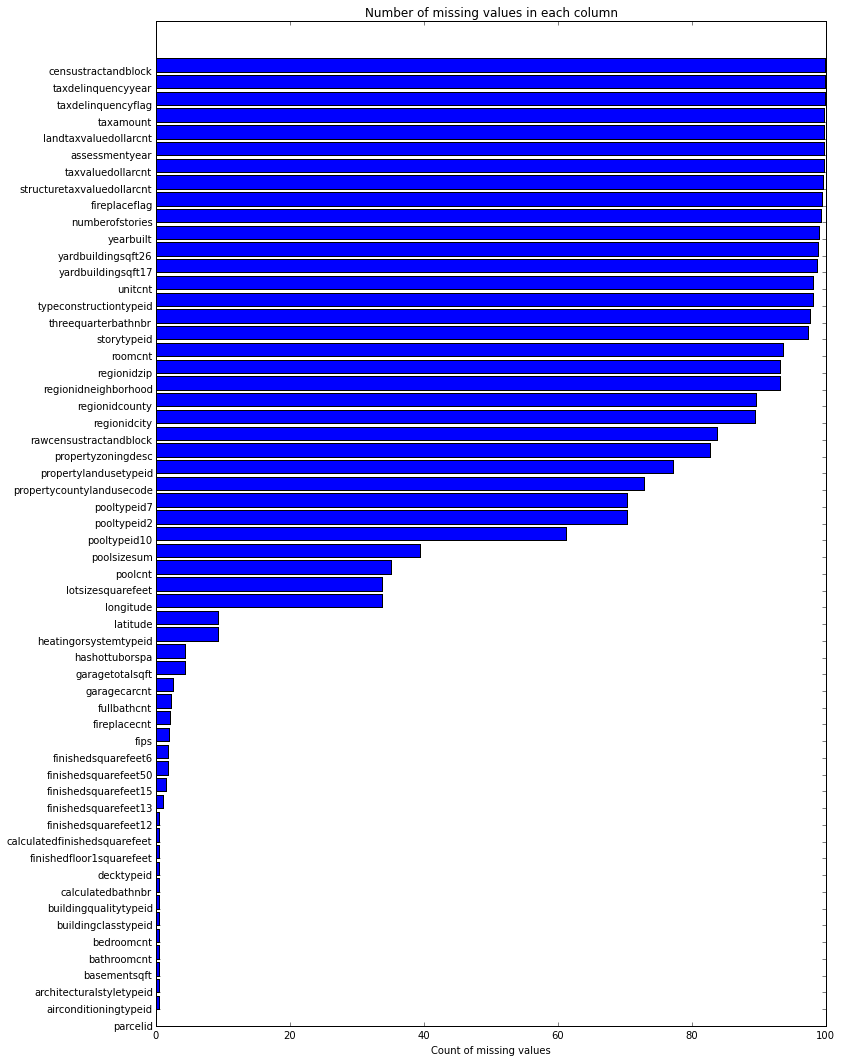

In [5]:

ind = range(len(null_features))
fig, ax = plt.subplots(figsize=(12,18))
rects = ax.barh(ind, null_features['missing_percent'], color='blue')
ax.set_yticks(ind)
ax.set_yticklabels(null_features['column_name'], rotation='horizontal')
ax.set_xlabel("Count of missing values")
ax.set_title("Number of missing values in each column")

In [11]:
len(null_features)

58

In [6]:
label_data = pd.read_csv('../data/train_2016.csv')

In [7]:
label_data.head()

,parcelid,logerror,transactiondate
0,11016594,0.0276,2016-01-01
1,14366692,-0.1684,2016-01-01
2,12098116,-0.0040,2016-01-01
3,12643413,0.0218,2016-01-02
4,14432541,-0.0050,2016-01-02


In [8]:
prop_features.head()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9,2015,9,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,27516,2015,27516,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,650756,1413387,2015,762631,20800.37,NaN,NaN,NaN
3,10859147,NaN,NaN,NaN,0,0,3,7,NaN,NaN,...,1,NaN,571346,1156834,2015,585488,14557.57,NaN,NaN,NaN
4,10879947,NaN,NaN,NaN,0,0,4,NaN,NaN,NaN,...,NaN,NaN,193796,433491,2015,239695,5725.17,NaN,NaN,NaN


In [9]:
prop_features.describe()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,yardbuildingsqft26,yearbuilt,numberofstories,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyyear,censustractandblock
count,2.985217e+06,811519.000000,6061.000000,1628.000000,2973755.000000,2973767.000000,12629.000000,1938488.000000,2856305.000000,17096,...,2647.000000,2925289.000000,682069.000000,2.930235e+06,2.942667e+06,2973778.000000,2917484.000000,2953967.000000,56464.000000,2.910091e+06
mean,1.332586e+07,1.931166,7.202607,646.883292,2.209143,3.088949,3.725948,5.784787,2.299263,66,...,278.296562,1964.261641,1.401464,1.708836e+05,4.204790e+05,2014.999459,252478.029469,5377.607139,13.892409,6.048431e+13
std,7.909966e+06,3.148587,2.436290,538.793473,1.077754,1.275859,0.501700,1.805352,1.000736,0,...,369.731508,23.441319,0.539076,4.020683e+05,7.263467e+05,0.036832,445013.169618,9183.107128,2.581006,3.249035e+11
min,1.071172e+07,1.000000,2.000000,20.000000,0.000000,0.000000,1.000000,1.000000,1.000000,66,...,10.000000,1801.000000,1.000000,1.000000e+00,1.000000e+00,2000.000000,1.000000,1.340000,0.000000,-1.000000e+00
25%,1.164371e+07,1.000000,7.000000,272.000000,2.000000,2.000000,3.000000,4.000000,2.000000,66,...,96.000000,1950.000000,1.000000,7.480000e+04,1.796750e+05,2015.000000,74836.000000,2461.070000,14.000000,6.037400e+13
50%,1.254509e+07,1.000000,7.000000,534.000000,2.000000,3.000000,4.000000,7.000000,2.000000,66,...,168.000000,1963.000000,1.000000,1.225900e+05,3.060860e+05,2015.000000,167042.000000,3991.780000,14.000000,6.037572e+13
75%,1.409712e+07,1.000000,7.000000,847.250000,3.000000,4.000000,4.000000,7.000000,3.000000,66,...,320.000000,1981.000000,2.000000,1.968890e+05,4.880000e+05,2015.000000,306918.000000,6201.005000,15.000000,6.059042e+13
max,1.696019e+08,13.000000,27.000000,8516.000000,20.000000,20.000000,5.000000,12.000000,20.000000,66,...,6141.000000,2015.000000,41.000000,2.514860e+08,2.827860e+08,2016.000000,90246219.000000,3458861.120000,99.000000,4.830301e+14
